In [1]:
#does host response time improves booking of airbnb listing?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('model_data_improvised.csv')
pd.set_option('display.max_columns',None)
data.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,wifi,smoke_alarm,essentials,carbon_monoxide_alarm,heating,hangers,hair_dryer,long_term_stays_allowed,iron,kitchen,shampoo,hot_water,dedicated_workspace,fire_extinguisher,washer,dryer,coffee_maker,microwave,refrigerator,dishes_and_silverware,bed_linens,cooking_basics,tv,first_aid_kit,private_entrance,free_street_parking,oven,stove,extra_pillows_and_blankets,dishwasher,luggage_dropoff_allowed,bathtub,security_cameras_on_property,lockbox,lock_on_bedroom_door,backyard,free_parking_on_premises,elevator,keypad,shower_gel,room-darkening_shades,freezer,air_conditioning,patio_or_balcony,body_soap,dining_table,cleaning_products,hot_water_kettle,conditioner,toaster,wine_glasses,indoor_fireplace,bbq_grill,paid_parking_off_premises,gym,baking_sheet,outdoor_furniture,laundromat_nearby,pack_\u2019n_play/travel_crib,portable_fans,ethernet_connection,host_greets_you,breakfast,paid_parking_on_premises,outdoor_dining_area,single_level_home,building_staff,smart_lock,private_patio_or_balcony,mini_fridge,clothing_storage,children\u2019s_books_and_toys,central_heating,cleaning_before_checkout,clothing_storage:_closet,barbecue_utensils,crib,hot_tub,shared_patio_or_balcony,board_games,high_chair,rice_maker,private_fenced_garden_or_backyard,drying_rack_for_clothing,shared_fenced_garden_or_backyard,bathroom_essentials,bedroom_comforts,pour-over_coffee,ceiling_fan,keurig_coffee_machine,children\u2019s_dinnerware,fire_pit,free_dryer_\u2013_in_unit,pool,paid_parking_garage_off_premises,safe,free_washer_\u2013_in_unit,babysitter_recommendations,portable_heater,outlet_covers,mean_price,Success_rate,host_in_sfo,licensed
0,0,100,98%,t,1.0,t,t,Western Addition,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,315,42,0,4.87,4.95,4.95,4.90,4.98,f,2.08,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,172.2,0.71303,1.0,0.0
1,2,100,71%,f,2.0,t,t,Bernal Heights,Entire rental unit,Entire home/apt,5,1 bath,2.0,3.0,30,60,30.0,30.0,60.0,60.0,30.0,60.0,t,111,0,0,4.88,4.87,4.89,4.85,4.77,f,0.72,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235.0,0.00000,0.0,0.0
2,0,100,100%,f,10.0,t,t,Haight Ashbury,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,32,60,32.0,32.0,60.0,60.0,32.0,60.0,t,19,0,0,4.20,3.87,4.67,4.60,4.73,f,0.13,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62.1,0.00000,1.0,0.0
3,0,100,100%,f,10.0,t,t,Haight Ashbury,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,32,90,32.0,32.0,90.0,90.0,32.0,90.0,t,8,0,0,4.63,4.38,4.75,4.75,4.63,f,0.09,1,1,0,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62.1,0.00000,1.0,0.0
4,2,94,0%,f,2.0,t,t,Western Addition,Entire condominium (condo),Entire home/apt,4,1.5 baths,2.0,2.0,7,111,7.0,7.0,111.0,111.0,7.0,111.0,t,28,0,0,4.87,

In [4]:
data.shape

(6411, 137)

In [5]:
data['host_response_time'].replace([0,1,2,3],['within an hour', 'within a few hours', 'within a day', 'a few days or more'],
                                   inplace=True)

# HOST RESPONSE TIME

0.039932770235997984


C:\Users\tempt\Anaconda3\envs\Kanmani\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


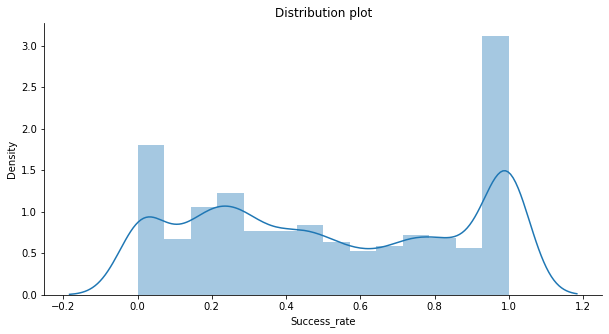

In [6]:
print(data['Success_rate'].skew())
plt.figure(figsize=(10,5))
plt.title("Distribution plot")
sns.distplot(data['Success_rate'])
sns.despine()
plt.show()

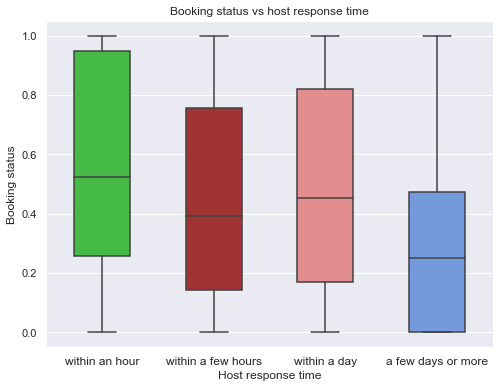

In [7]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','deeppink','darkkhaki']
sns.set(rc={'figure.figsize':(8,6)})
boxplot=sns.boxplot(y='Success_rate',x='host_response_time',data=data,width=0.5,palette=colors,showfliers=False)
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Booking status vs host response time')
boxplot.set_xticks([0,1,2,3])
boxplot.set_xticklabels(['within an hour', 'within a few hours', 'within a day', 'a few days or more'],rotation=0,fontsize='medium')
boxplot.set_xlabel('Host response time')
boxplot.set_ylabel('Booking status')
plt.show()

In [8]:
x=data.loc[data['host_response_time']=='within an hour','Success_rate']
y=data.loc[data['host_response_time']!='within an hour','Success_rate']

In [9]:
# check the assumption of normality
from scipy import stats
stats.shapiro(x)
#p-value<0.05- so non-normal distribution

ShapiroResult(statistic=0.897693395614624, pvalue=0.0)

# Variance test

In [10]:
if np.var(x)/np.var(y)<4:
    print("Variance between different groups are approximately equal. Proceed to perform student's t-test")
elif np.var(x)/np.var(y)>4:
    print("Variance between different groups are not equal. Proceed to perform Welch's t-test")


Variance between different groups are approximately equal. Proceed to perform student's t-test


In [11]:
from scipy.stats import levene
stat,p=levene(x,y,center='median')
print(p)
alpha=0.05
if p<alpha:
    print("Reject null.Variance between different groups are not equal. Perform Welch's t-test")
else:
    print("Do not reject null.Variance between different groups are approximately equal. Proceed to perform student's t-test")
    

0.9169649211413186
Do not reject null.Variance between different groups are approximately equal. Proceed to perform student's t-test


In [12]:
import scipy
if np.var(x)>np.var(y):
    F=np.var(x)/np.var(y)
    dfn=len(x)-1
    dfd=len(y)-1
    p_value=scipy.stats.f.cdf(F,dfn,dfd)
    print(p_value)
elif np.var(x)<np.var(y):
    F=np.var(y)/np.var(x)
    dfn=len(y)-1
    dfd=len(x)-1
    p_value=scipy.stats.f.cdf(F,dfn,dfd)
    print(p_value)

0.741563467175218


# Welch's t test

In [13]:
print(stats.ttest_ind(x,y,equal_var=False))

Ttest_indResult(statistic=10.561394882497584, pvalue=8.637072416882641e-26)


# ANOVA, PAIRWISE COMPARISON with and without type I correction

In [14]:
#one way ANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm
model=ols('Success_rate ~ host_response_time',data=data).fit()
sm.stats.anova_lm(model,typ=1)
# p<0.01. we reject null. Hence atleast two population means have different values

,df,sum_sq,mean_sq,F,PR(>F)
host_response_time,3.0,18.624823,6.208274,51.188413,1.096178e-32
Residual,6407.0,777.058936,0.121283,NaN,NaN


In [15]:
#welch t test without type I correction
import scikit_posthocs as sp
sp.posthoc_ttest(data, val_col='Success_rate', group_col='host_response_time', equal_var=False,sort=True)

,a few days or more,within a day,within a few hours,within an hour
a few days or more,1.000000e+00,1.250834e-06,1.290031e-10,3.422601e-18
within a day,1.250834e-06,1.000000e+00,7.238956e-03,7.549900e-16
within a few hours,1.290031e-10,7.238956e-03,1.000000e+00,6.901869e-11
within an hour,3.422601e-18,7.549900e-16,6.901869e-11,1.000000e+00


In [16]:
#pairwise welch t test with Holm-Bonferroni correction to adjust type I error
sp.posthoc_ttest(data, val_col='Success_rate', group_col='host_response_time',equal_var=False, p_adjust='holm',sort=True )

,a few days or more,within a day,within a few hours,within an hour
a few days or more,1.000000e+00,2.501669e-06,3.870094e-10,2.053561e-17
within a day,2.501669e-06,1.000000e+00,7.238956e-03,3.774950e-15
within a few hours,3.870094e-10,7.238956e-03,1.000000e+00,2.760748e-10
within an hour,2.053561e-17,3.774950e-15,2.760748e-10,1.000000e+00


# SUPER HOST

In [17]:
print((data.loc[data['host_is_superhost']=='t','Success_rate']).shape)
(data.loc[data['host_is_superhost']=='f','Success_rate']).shape

(2774,)


(3637,)

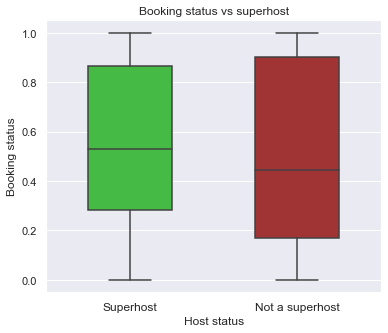

In [18]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','deeppink','darkkhaki']
sns.set(rc={'figure.figsize':(6,5)})
boxplot=sns.boxplot(y='Success_rate',x='host_is_superhost',data=data,width=0.5,palette=colors,showfliers=False)
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Booking status vs superhost')
boxplot.set_xticks([0,1])
boxplot.set_xticklabels(['Superhost', 'Not a superhost'],rotation=0,fontsize='medium')
boxplot.set_xlabel('Host status')
boxplot.set_ylabel('Booking status')
plt.show()

In [19]:
x=data.loc[data['host_is_superhost']=='t','Success_rate']
y=data.loc[data['host_is_superhost']!='t','Success_rate']

In [20]:
print(x.shape,y.shape)

(2774,) (3637,)


In [21]:
#check the variance of all 4 groups
print(np.var(x))
print(np.var(y))
#check if variance is same or different across different groups
if np.var(y)/np.var(x)<4:
    print("Variance between 2 different host groups are approximately equal. Proceed to perform student's t-test")
elif np.var(y)/np.var(x)>4:
    print("Variance between 2 different host groups are not equal. Proceed to perform Welch's t-test")

0.10090571148684489
0.1400382472588645
Variance between 2 different host groups are approximately equal. Proceed to perform student's t-test


In [22]:
print(stats.ttest_ind(x,y,equal_var=False))

Ttest_indResult(statistic=7.398481875460547, pvalue=1.5559412869102184e-13)


In [23]:
sp.posthoc_ttest(data, val_col='Success_rate', group_col='host_is_superhost',equal_var=False )

,t,f
t,1.000000e+00,1.555941e-13
f,1.555941e-13,1.000000e+00


# NEIGHBOURHOOD

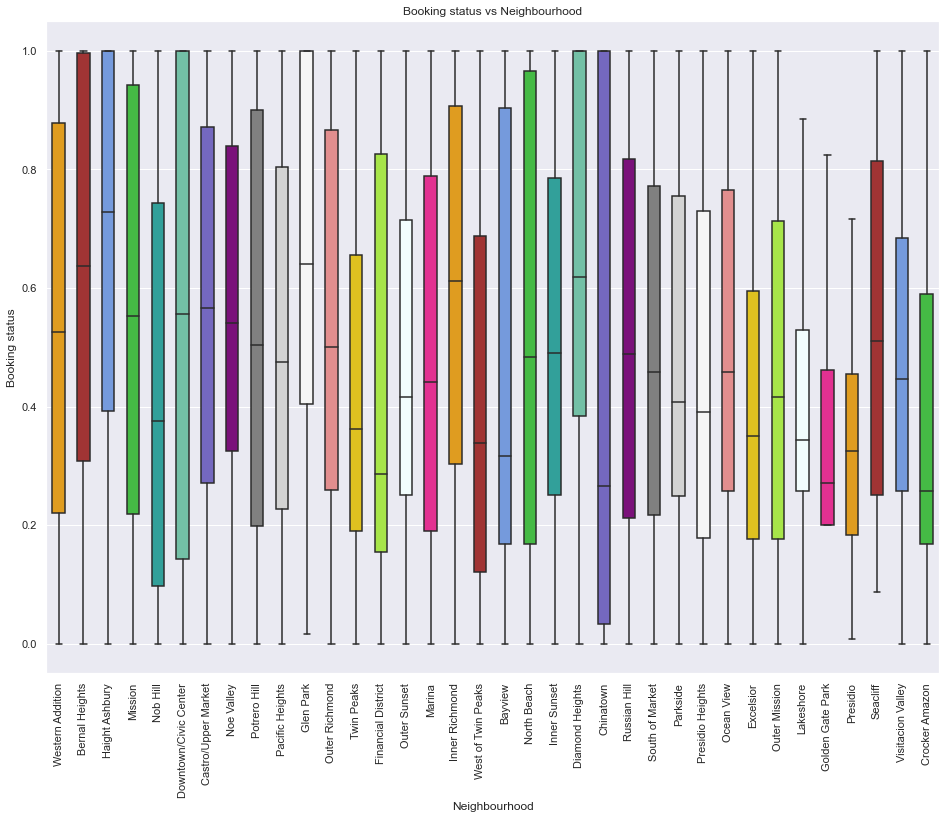

In [24]:
colors=['orange','firebrick','cornflowerblue','limegreen','lightseagreen','mediumaquamarine','slateblue','darkmagenta',
       'gray','lightgray','whitesmoke','lightcoral','gold','greenyellow','azure','deeppink']
sns.set(rc={'figure.figsize':(16,12)})
boxplot=sns.boxplot(y='Success_rate',x='neighbourhood_cleansed',data=data,width=0.5,palette=colors,showfliers=False)
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Booking status vs Neighbourhood')
boxplot.set_xlabel('Neighbourhood')
boxplot.set_ylabel('Booking status')
plt.show()

In [25]:
neighbourhood=data['neighbourhood_cleansed'].unique()
significant_neighbourhood=[]
for i in neighbourhood:
    x=data.loc[data['neighbourhood_cleansed']==i,'Success_rate']
    y=data.loc[data['neighbourhood_cleansed']!=i,'Success_rate']
    if np.var(x)>np.var(y):
        z=np.var(x)/np.var(y)
    else: 
        z=np.var(y)/np.var(x)
    l=stats.ttest_ind(x,y,equal_var=False)
    
    if l.pvalue<=0.02:
        print(i,',',x.shape[0],'records,','p-value',l.pvalue)
        significant_neighbourhood.append(i)

Bernal Heights , 293 records, p-value 6.253266274255789e-07
Haight Ashbury , 301 records, p-value 3.560333615542289e-11
Mission , 533 records, p-value 0.007865926216725076
Nob Hill , 321 records, p-value 2.4744254240078757e-07
Downtown/Civic Center , 708 records, p-value 0.019626580171911375
Glen Park , 58 records, p-value 0.006076247695075448
Outer Sunset , 255 records, p-value 0.007386749062707768
Inner Richmond , 172 records, p-value 0.0023531825322135294
West of Twin Peaks , 88 records, p-value 0.0016357782615945727
Chinatown , 123 records, p-value 0.017028386151639104
Excelsior , 120 records, p-value 0.00017947022625642244
Lakeshore , 48 records, p-value 0.0034053829524495257


In [26]:
sp.posthoc_ttest(data, val_col='Success_rate', group_col='neighbourhood_cleansed',equal_var=False,p_adjust='holm' )

,Western Addition,Bernal Heights,Haight Ashbury,Mission,Nob Hill,Downtown/Civic Center,Castro/Upper Market,Noe Valley,Potrero Hill,Pacific Heights,Glen Park,Outer Richmond,Twin Peaks,Financial District,Outer Sunset,Marina,Inner Richmond,West of Twin Peaks,Bayview,North Beach,Inner Sunset,Diamond Heights,Chinatown,Russian Hill,South of Market,Parkside,Presidio Heights,Ocean View,Excelsior,Outer Mission,Lakeshore,Golden Gate Park,Presidio,Seacliff,Visitacion Valley,Crocker Amazon
Western Addition,1.000000,1.000000e+00,1.086714e-02,1.000000,2.594576e-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,0.495379,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000,8.346551e-02,1.000000,0.945353,1.0,1.000000,1.0,1.0,1.000000
Bernal Heights,1.000000,1.000000e+00,1.000000e+00,1.000000,1.581121e-09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.098725,0.007153,5.980807e-05,0.002465,1.000000,0.000429,0.004724,1.000000,1.000000,1.0,0.008697,0.695533,1.297734e-04,0.014069,1.0,1.000000,4.577744e-06,0.014097,0.003928,1.0,1.000000,1.0,1.0,0.383663
Haight Ashbury,0.010867,1.000000e+00,1.000000e+00,0.190667,2.683260e-13,0.082415,1.000000,1.000000,0.135891,0.045594,1.000000,0.458603,0.012258,0.000114,7.239470e-08,0.000019,1.000000,0.000014,0.000075,0.068623,0.039608,1.0,0.000352,0.023964,7.128342e-08,0.000309,1.0,0.266035,2.740878e-08,0.000432,0.000346,1.0,0.829800,1.0,1.0,0.099894
Mission,1.000000,1.000000e+00,1.906673e-01,1.000000,1.795221e-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.530665e-01,1.000000,1.000000,0.074403,1.000000,1.000000,1.000000,1.0,0.934975,1.000000,4.829193e-01,1.000000,1.0,1.000000,4.761066e-03,1.000000,0.220551,1.0,1.000000,1.0,1.0,1.000000
Nob Hill,0.002595,1.581121e-09,2.683260e-13,0.000018,1.000000e+00,0.000065,0.000149,0.000462,1.000000,1.000000,0.005725,0.434960,1.000000,1.000000,1.000000e+00,1.000000,0.000031,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000
Downtown/Civic Center,1.000000,1.000000e+00,8.241532e-02,1.000000,6.519908e-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.556059e-01,1.000000,1.000000,0.124711,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.023199e-02,1.000000,0.326872,1.0,1.000000,1.0,1.0,1.000000
Castro/Upper Market,1.000000,1.000000e+00,1.000000e+00,1.000000,1.488186e-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.087900e-01,1.000000,1.000000,0.084152,1.000000,1.000000,1.000000,1.0,0.967817,1.000000,1.000000e+00,1.000000,1.0,1.000000,8.339608e-03,1.000000,0.218236,1.0,1.000000,1.0,1.0,1.000000
Noe Valley,1.000000,1.000000e+00,1.000000e+00,1.000000,4.618368e-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.180992e-01,1.000000,1.000000,0.110464,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.388104e-02,1.000000,0.259190,1.0,1.000000,1.0,1.0,1.000000
Potrero Hill,1.000000,1.000000e+00,1.358907e-01,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000
Pacific Heights,1.000000,1.000000e+00,4.559434e-02,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000


# REVIEW RATING VS NEIGHBOURHOOD

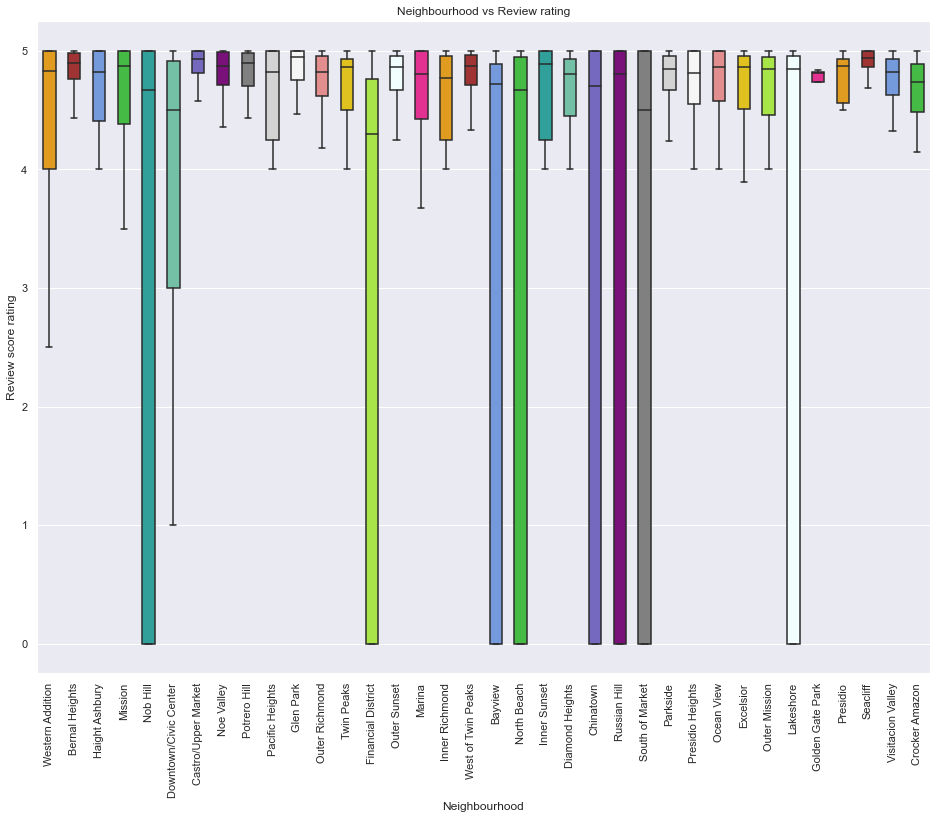

In [27]:
colors=['orange','firebrick','cornflowerblue','limegreen','lightseagreen','mediumaquamarine','slateblue','darkmagenta',
       'gray','lightgray','whitesmoke','lightcoral','gold','greenyellow','azure','deeppink']
sns.set(rc={'figure.figsize':(16,12)})
boxplot=sns.boxplot(y='review_scores_rating',x='neighbourhood_cleansed',data=data,width=0.5,palette=colors,showfliers=False)
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Neighbourhood vs Review rating')
boxplot.set_xlabel('Neighbourhood')
boxplot.set_ylabel('Review score rating')
plt.show()

In [28]:
neighbourhood=data['neighbourhood_cleansed'].unique()
significant_neighbourhood=[]
   
print('Significant neighbourhood & their p value')
print('******************************************')   
for i in neighbourhood:
    x=data.loc[data['neighbourhood_cleansed']==i,'review_scores_rating']
    y=data.loc[data['neighbourhood_cleansed']!=i,'review_scores_rating']
    if np.var(x)>np.var(y):
        z=np.var(x)/np.var(y)
    else: 
        z=np.var(y)/np.var(x)
    l=stats.ttest_ind(x,y,equal_var=False)
    
    if l.pvalue<=0.05:
        print(i,',',x.shape[0],'records,','p-value',l.pvalue)
        significant_neighbourhood.append(i)

Significant neighbourhood & their p value
******************************************
Bernal Heights , 293 records, p-value 1.2135578417162477e-15
Nob Hill , 321 records, p-value 0.0002514399568428447
Downtown/Civic Center , 708 records, p-value 5.617816819587316e-05
Castro/Upper Market , 287 records, p-value 1.398943347381691e-08
Noe Valley , 230 records, p-value 0.00010280753511255537
Potrero Hill , 151 records, p-value 0.03020609383374748
Glen Park , 58 records, p-value 0.04460677604890114
Outer Richmond , 146 records, p-value 1.5254734963172389e-05
Financial District , 173 records, p-value 1.9869196937788448e-08
Outer Sunset , 255 records, p-value 2.248009826047943e-10
West of Twin Peaks , 88 records, p-value 4.2772859128534677e-07
North Beach , 191 records, p-value 0.008433581650913614
South of Market , 461 records, p-value 1.4060393586405603e-16
Parkside , 109 records, p-value 0.014556464575869206
Excelsior , 120 records, p-value 0.027075519192564096
Golden Gate Park , 4 records, 

In [29]:
sp.posthoc_ttest(data, val_col='review_scores_rating', group_col='neighbourhood_cleansed',equal_var=False,p_adjust='holm' )

,Western Addition,Bernal Heights,Haight Ashbury,Mission,Nob Hill,Downtown/Civic Center,Castro/Upper Market,Noe Valley,Potrero Hill,Pacific Heights,Glen Park,Outer Richmond,Twin Peaks,Financial District,Outer Sunset,Marina,Inner Richmond,West of Twin Peaks,Bayview,North Beach,Inner Sunset,Diamond Heights,Chinatown,Russian Hill,South of Market,Parkside,Presidio Heights,Ocean View,Excelsior,Outer Mission,Lakeshore,Golden Gate Park,Presidio,Seacliff,Visitacion Valley,Crocker Amazon
Western Addition,1.000000e+00,8.951876e-07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.296739e-03,1.592667e-01,1.000000e+00,1.000000,1.000000,2.445729e-02,1.000000,4.272834e-03,1.577512e-04,1.000000e+00,1.000000e+00,6.458829e-04,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,5.418634e-05,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,7.903845e-05,1.0,3.077189e-26,1.000000,1.000000
Bernal Heights,8.951876e-07,1.000000e+00,4.591154e-02,1.225495e-03,7.765323e-11,1.064129e-14,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.570651e-13,1.000000e+00,6.538787e-01,4.547080e-02,1.000000e+00,1.399676e-04,1.928588e-06,1.331270e-01,1.0,1.234791e-03,2.183271e-03,1.279265e-25,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,4.666462e-05,1.000000,1.000000
Haight Ashbury,1.000000e+00,4.591154e-02,1.000000e+00,1.000000e+00,1.898274e-01,5.209124e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.492913e-05,7.588934e-01,1.000000e+00,1.000000e+00,3.629157e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.977931e-08,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.915746e-03,1.0,2.437356e-14,1.000000,1.000000
Mission,1.000000e+00,1.225495e-03,1.000000e+00,1.000000e+00,8.505488e-02,1.410848e-01,3.802598e-01,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,9.007891e-06,7.994223e-02,1.000000e+00,1.000000e+00,8.198891e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,2.506996e-10,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,4.134720e-03,1.0,1.361527e-23,1.000000,1.000000
Nob Hill,1.000000e+00,7.765323e-11,1.898274e-01,8.505488e-02,1.000000e+00,1.000000e+00,2.317860e-07,1.045233e-04,4.649908e-02,1.000000,0.314652,1.445764e-05,0.442099,1.000000e+00,2.013154e-08,4.782800e-01,1.000000e+00,3.465474e-07,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.585300e-02,1.000000,0.720690,4.840589e-02,0.232917,1.000000,7.234234e-08,1.0,5.280387e-27,0.794850,0.582360
Downtown/Civic Center,1.000000e+00,1.064129e-14,5.209124e-01,1.410848e-01,1.000000e+00,1.000000e+00,8.750200e-09,7.105281e-05,1.480634e-01,1.000000,1.000000,1.056596e-05,1.000000,9.100699e-02,1.691160e-10,1.000000e+00,1.000000e+00,3.362983e-07,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,3.619897e-03,8.589373e-02,1.000000,1.000000,1.608286e-01,0.806494,1.000000,2.038263e-04,1.0,7.190530e-47,1.000000,1.000000
Castro/Upper Market,1.296739e-03,1.000000e+00,1.000000e+00,3.802598e-01,2.317860e-07,8.750200e-09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,7.382493e-11,1.000000e+00,1.000000e+00,9.056850e-01,1.000000e+00,5.754236e-03,2.025735e-04,1.000000e+00,1.0,2.329688e-02,6.134274e-02,4.444405e-19,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,3.777809e-06,1.000000,1.000000
Noe Valley,1.592667e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.045233e-04,7.105281e-05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.229912e-08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.090882e-01,8.247436e-03,1.000000e+00,1.0,2.473656e-01,7.574100e-01,9.604151e-14,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,3.287138e-01,1.0,1.909207e-06,1.000000,1.000000
Potrero Hill,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.649908e-02,1.480634e-

In [30]:
data.loc[data['has_availability']=='f',:]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,wifi,smoke_alarm,essentials,carbon_monoxide_alarm,heating,hangers,hair_dryer,long_term_stays_allowed,iron,kitchen,shampoo,hot_water,dedicated_workspace,fire_extinguisher,washer,dryer,coffee_maker,microwave,refrigerator,dishes_and_silverware,bed_linens,cooking_basics,tv,first_aid_kit,private_entrance,free_street_parking,oven,stove,extra_pillows_and_blankets,dishwasher,luggage_dropoff_allowed,bathtub,security_cameras_on_property,lockbox,lock_on_bedroom_door,backyard,free_parking_on_premises,elevator,keypad,shower_gel,room-darkening_shades,freezer,air_conditioning,patio_or_balcony,body_soap,dining_table,cleaning_products,hot_water_kettle,conditioner,toaster,wine_glasses,indoor_fireplace,bbq_grill,paid_parking_off_premises,gym,baking_sheet,outdoor_furniture,laundromat_nearby,pack_\u2019n_play/travel_crib,portable_fans,ethernet_connection,host_greets_you,breakfast,paid_parking_on_premises,outdoor_dining_area,single_level_home,building_staff,smart_lock,private_patio_or_balcony,mini_fridge,clothing_storage,children\u2019s_books_and_toys,central_heating,cleaning_before_checkout,clothing_storage:_closet,barbecue_utensils,crib,hot_tub,shared_patio_or_balcony,board_games,high_chair,rice_maker,private_fenced_garden_or_backyard,drying_rack_for_clothing,shared_fenced_garden_or_backyard,bathroom_essentials,bedroom_comforts,pour-over_coffee,ceiling_fan,keurig_coffee_machine,children\u2019s_dinnerware,fire_pit,free_dryer_\u2013_in_unit,pool,paid_parking_garage_off_premises,safe,free_washer_\u2013_in_unit,babysitter_recommendations,portable_heater,outlet_covers,mean_price,Success_rate,host_in_sfo,licensed
52,within an hour,94,NaN,f,1.0,t,t,Outer Sunset,Private room in residential home,Private room,2,1 bath,1.0,1.0,60,60,60.0,60.0,60.0,60.0,60.0,60.0,f,1,0,0,1.00,0.00,0.00,1.00,0.00,f,0.01,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100.0,1.000000,1.0,0.0
614,within an hour,94,NaN,f,1.0,t,t,Pacific Heights,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,30,60,30.0,30.0,60.0,60.0,30.0,60.0,f,21,0,0,4.00,3.65,4.65,4.35,4.50,f,0.29,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160.0,1.000000,0.0,0.0
622,within an hour,94,NaN,f,1.0,t,t,South of Market,Entire rental unit,Entire home/apt,1,0.5 bath,1.0,1.0,30,30,30.0,30.0,30.0,30.0,30.0,30.0,f,0,0,0,0.00,0.00,0.00,0.00,0.00,f,0.00,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195.7,1.000000,1.0,0.0
805,within an hour,94,NaN,f,2.0,t,t,Mission,Private room in residential home,Private room,4,1 private bath,1.0,1.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,f,46,0,0,4.53,4.71,4.75,4.78,4.73,f,0.65,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130.0,1.000000,1.0,1.0
921,within an hour,94,NaN,f,1.0,t,t,Potrero Hill,Private room in rental unit,Private room,1,1 bath,1.0,1.0,

In [32]:
data['bathrooms_text'].value_counts()

1 bath              3141
1 private bath       865
2 baths              731
1 shared bath        649
1.5 baths            284
1.5 shared baths     113
2.5 baths            103
2 shared baths        90
3 baths               89
5 shared baths        64
3.5 baths             41
2.5 shared baths      34
4 baths               32
0 shared baths        25
3 shared baths        25
0 baths               22
4 shared baths        21
10 shared baths       17
5 baths               17
4.5 baths             14
3.5 shared baths       8
0.5 shared bath        6
6 shared baths         6
0.5 private bath       3
0.5 bath               3
10 baths               2
6.5 shared baths       2
4.5 shared baths       2
5.5 baths              1
6 baths                1
Name: bathrooms_text, dtype: int64

# Room type

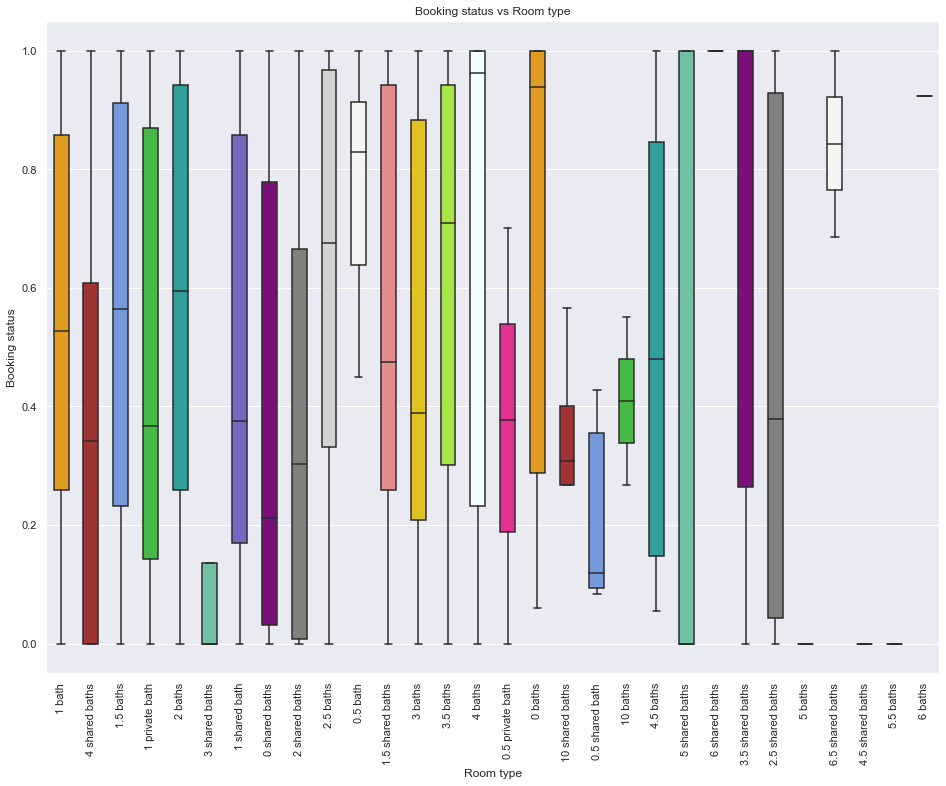

In [33]:
colors=['orange','firebrick','cornflowerblue','limegreen','lightseagreen','mediumaquamarine','slateblue','darkmagenta',
       'gray','lightgray','whitesmoke','lightcoral','gold','greenyellow','azure','deeppink']
sns.set(rc={'figure.figsize':(16,12)})
boxplot=sns.boxplot(y='Success_rate',x='bathrooms_text',data=data,width=0.5,palette=colors,showfliers=False)
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Booking status vs Room type')
boxplot.set_xlabel('Room type')
boxplot.set_ylabel('Booking status')
plt.show()

In [37]:
bathtext=data['bathrooms_text'].unique()
significant_bathtext=[]
for i in bathtext:
    x=data.loc[data['bathrooms_text']==i,'Success_rate']
    y=data.loc[data['bathrooms_text']!=i,'Success_rate']
    if np.var(x)>np.var(y):
        z=np.var(x)/np.var(y)
    else: 
        z=np.var(y)/np.var(x)
    l=stats.ttest_ind(x,y,equal_var=False)
    
    if l.pvalue<=0.02:
        print(i,',',x.shape[0],'records,','p-value',l.pvalue)
        significant_bathtext.append(i)

1 bath , 3141 records, p-value 1.4083913497799634e-06
1 private bath , 865 records, p-value 1.272352542525798e-05
2 baths , 731 records, p-value 4.6883385503619585e-05
3 shared baths , 25 records, p-value 4.4669739791703005e-06
1 shared bath , 649 records, p-value 7.3325790147755e-06
2 shared baths , 90 records, p-value 9.278629322538914e-05
2.5 baths , 103 records, p-value 0.003935535196891808
10 shared baths , 17 records, p-value 0.0020699034949244327
5 shared baths , 64 records, p-value 0.0008320636762145945
6 shared baths , 6 records, p-value 0.0
5 baths , 17 records, p-value 0.00010720591385845485
4.5 shared baths , 2 records, p-value 0.0


C:\Users\tempt\Anaconda3\envs\Kanmani\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [38]:
sp.posthoc_ttest(data, val_col='Success_rate', group_col='bathrooms_text',equal_var=False,p_adjust='holm' )

,1 bath,4 shared baths,1.5 baths,1 private bath,2 baths,3 shared baths,1 shared bath,0 shared baths,2 shared baths,2.5 baths,0.5 bath,1.5 shared baths,3 baths,3.5 baths,4 baths,0.5 private bath,0 baths,10 shared baths,0.5 shared bath,10 baths,4.5 baths,5 shared baths,6 shared baths,3.5 shared baths,2.5 shared baths,5 baths,6.5 shared baths,4.5 shared baths,5.5 baths,6 baths
1 bath,1.000000,1.000000,1.000000e+00,7.663821e-05,1.000000e+00,7.761130e-04,4.953262e-05,1.000000,5.148667e-03,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,2.285437e-01,1.000000,1.0,1.000000,1.045922e-01,0.000000e+00,1.000000,1.000000,0.023107,1.0,0.000000e+00,NaN,NaN
4 shared baths,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,3.547936e-05,1.000000,1.000000,1.000000,1.0,2.069063e-02,NaN,NaN
1.5 baths,1.000000,1.000000,1.000000e+00,6.543294e-01,1.000000e+00,5.963258e-04,2.392426e-01,1.000000,2.086164e-02,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,2.418307e-01,1.000000,1.0,1.000000,1.359230e-01,1.612977e-56,1.000000,1.000000,0.018561,1.0,1.608728e-72,NaN,NaN
1 private bath,0.000077,1.000000,6.543294e-01,1.000000e+00,1.121990e-05,1.436718e-02,1.000000e+00,1.000000,1.000000e+00,2.213802e-02,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,7.216428e-214,1.000000,1.000000,0.153081,1.0,2.173784e-186,NaN,NaN
2 baths,1.000000,1.000000,1.000000e+00,1.121990e-05,1.000000e+00,2.383153e-04,4.694849e-06,1.000000,4.829716e-04,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,4.930479e-02,1.000000,1.0,1.000000,2.455589e-02,1.489137e-142,1.000000,1.000000,0.010723,1.0,1.040546e-203,NaN,NaN
3 shared baths,0.000776,1.000000,5.963258e-04,1.436718e-02,2.383153e-04,1.000000e+00,2.292036e-02,1.000000,1.000000e+00,3.430430e-05,1.0,1.100873e-03,1.865992e-02,3.444200e-04,8.839837e-04,1.0,0.002490,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,3.495576e-10,1.000000,0.652255,1.000000,1.0,1.000000e+00,NaN,NaN
1 shared bath,0.000050,1.000000,2.392426e-01,1.000000e+00,4.694849e-06,2.292036e-02,1.000000e+00,1.000000,1.000000e+00,9.152862e-03,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,3.983655e-163,1.000000,1.000000,0.207827,1.0,1.556092e-134,NaN,NaN
0 shared baths,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,2.388678e-05,1.000000,1.000000,1.000000,1.0,4.157269e-02,NaN,NaN
2 shared baths,0.005149,1.000000,2.086164e-02,1.000000e+00,4.829716e-04,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,5.931442e-04,1.0,2.285437e-01,1.000000e+00,1.530815e-01,2.945891e-01,1.0,0.479446,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.613276e-27,1.000000,1.000000,1.000000,1.0,2.487623e-14,NaN,NaN
2.5 baths,1.000000,1.000000,1.000000e+00,2.213802e-02,1.000000e+00,3.430430e-05,9.152862e-03,1.000000,5.931442e-04,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000,9.737987e-03,1.000000,1.0,1.000000,7.366174e-03,2.601415e-17,1.000000,1.000000,0.002501,1.0,6.676379e-32,NaN,NaN
